# Solution creater template 

This notebook assumes that https://co2020-ba-vu.challenges.ortec.com/zips/Validator.zip has been unpacked to a subdirectory of the current directory called `ParticipantsSuite`, changes to a different location are obvious. 

It also assumes a subdirectory `instances` containing the instance files. 

In [1]:
import sys
import os
import pandas as pd
sys.path.append('./ParticipantsSuite')

from InstanceCVRPTWUI import InstanceCVRPTWUI
instance = InstanceCVRPTWUI('instances/co2020_challenge_r100d10_1.txt')

In [2]:
if instance.isValid():
    instance.calculateDistances()
    import numpy
    nLoc = len(instance.Coordinates)
    d_df = pd.DataFrame([ [ instance.calcDistance[i][j] for j in range(nLoc) ] for i in range(nLoc) ])

t_df = pd.DataFrame([(i.ID, i.weight, i.amount, i.cost) for i in instance.Tools], columns=['ID','weight','amount','cost']).set_index('ID')
r_df = pd.DataFrame([(i.ID, i.node, i.fromDay, i.toDay, i.numDays, i.tool, i.toolCount) for i in instance.Requests], columns=['ID','node','fromDay','toDay','numDays','tool','toolCount']).set_index('ID')
c_df = pd.DataFrame([(i.ID, i.X, i.Y) for i in instance.Coordinates], columns=['ID','X','Y']).set_index('ID')

## List of DataFrames with data:

Tools: `t_df`, Requests: `r_df`, Coordinates: `c_df`, Distances: `d_df`

In [3]:

# Solution.
t_df
r_df
c_df
d_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,5173,3875,4295,4307,3926,3955,4658,4818,5549,...,3445,3632,3294,3066,3321,4633,1285,4203,3509,4233
1,5173,0,5932,1324,1330,2028,2116,1047,1607,849,...,1779,1570,2022,5657,2123,584,4999,1100,2369,1235
2,3875,5932,0,4609,4605,3906,3826,4929,4579,5726,...,4457,4655,4147,817,3954,5674,2599,4877,3578,4700
3,4295,1324,4609,0,19,703,792,379,707,1298,...,948,866,1006,4359,985,1189,3883,431,1070,178
4,4307,1330,4605,19,0,699,786,372,687,1290,...,966,885,1020,4359,995,1202,3891,448,1071,196
5,3926,2028,3906,703,699,0,113,1033,910,1906,...,1055,1121,893,3676,715,1845,3350,1032,444,814
6,3955,2116,3826,792,786,113,0,1104,914,1955,...,1163,1234,987,3615,797,1949,3343,1138,448,914
7,4658,1047,4929,379,372,1033,1104,0,633,918,...,1259,1132,1363,4709,1360,1073,4263,561,1433,429
8,4818,1607,4579,707,687,910,914,633,0,1154,...,1626,1568,1614,4455,1518,1705,4257,1102,1352,873
9,5549,849,5726,1298,1290,1906,1955,918,1154,0,...,2111,1944,2260,5567,2276,1320,5182,1353,2330,1323


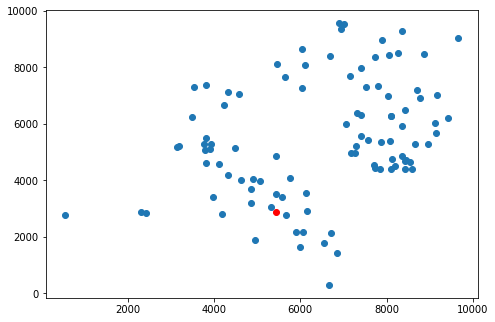

In [5]:
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(c_df.iloc[0:1].X, c_df.iloc[0:1].Y, color='r')
ax.scatter(c_df.iloc[1:99].X, c_df.iloc[1:99].Y)
plt.show()